In [115]:
# Instacart Market Basket Analysis 2 - Exploratory Data Analysis

In [116]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 150)

# matplotlib and seaborn for plotting
import matplotlib
matplotlib.rcParams['figure.dpi'] = 120 #resolution
matplotlib.rcParams['figure.figsize'] = (8,6) #figure size
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
color = sns.color_palette()

root = '../instacart_data_files/'


In [117]:
aisles = pd.read_csv(root + 'aisles.csv')
departments = pd.read_csv(root + 'departments.csv')
orders = pd.read_csv(root + 'orders.csv')
order_products_prior = pd.read_csv(root + 'order_products__prior.csv')
order_products_train = pd.read_csv(root + 'order_products__train.csv')
products = pd.read_csv(root + 'products.csv')

In [118]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [119]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [120]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [121]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [122]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [123]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [124]:
# Data Preperation

In [125]:

print("For Analysis, I am combining order_products_train and order_products_prior as order_products.\nI am also combining ither dataframes based on order_id, product_id, aisle_id and department_id I will merge those data with order_products and will create one single dataframe.")


For Analysis, I am combining order_products_train and order_products_prior as order_products.
I am also combining ither dataframes based on order_id, product_id, aisle_id and department_id I will merge those data with order_products and will create one single dataframe.


In [126]:
order_products = pd.concat([order_products_prior, order_products_train], ignore_index=True)
order_products.shape

(33819106, 4)

In [127]:
order_products = order_products.merge(products, on ='product_id', how='left')
order_products.shape

(33819106, 7)

In [128]:
order_products = order_products.merge(aisles, on ='aisle_id', how='left')
order_products.shape

(33819106, 8)

In [129]:
order_products = order_products.merge(departments, on ='department_id', how='left')
order_products.shape

(33819106, 9)

In [130]:
order_products = order_products.merge(orders, on ='order_id', how='left')
order_products.shape

(33819106, 15)

In [131]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


In [132]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   product_name            object 
 5   aisle_id                int64  
 6   department_id           int64  
 7   aisle                   object 
 8   department              object 
 9   user_id                 int64  
 10  eval_set                object 
 11  order_number            int64  
 12  order_dow               int64  
 13  order_hour_of_day       int64  
 14  days_since_prior_order  float64
dtypes: float64(1), int64(10), object(4)
memory usage: 3.8+ GB


In [133]:
# Reducing Memory
def reduce_memory(df):
    
    """
    This function reduce the dataframe memory usage by converting it's type for easier handling.
    
    Parameters: Dataframe
    Return: Dataframe
    """
    
    start_mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    
    for col in df.columns:
        if df[col].dtypes in ["int64", "int32", "int16"]:
            
            cmin = df[col].min()
            cmax = df[col].max()
            
            if cmin > np.iinfo(np.int8).min and cmax < np.iinfo(np.int8).max:
                df[col] = df[col].astype(np.int8)
            
            elif cmin > np.iinfo(np.int16).min and cmax < np.iinfo(np.int16).max:
                df[col] = df[col].astype(np.int16)
            
            elif cmin > np.iinfo(np.int32).min and cmax < np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)
        
        if df[col].dtypes in ["float64", "float32"]:
            
            cmin = df[col].min()
            cmax = df[col].max()
            
            if cmin > np.finfo(np.float16).min and cmax < np.finfo(np.float16).max:
                df[col] = df[col].astype(np.float16)
            
            elif cmin > np.finfo(np.float32).min and cmax < np.finfo(np.float32).max:
                df[col] = df[col].astype(np.float32)
    
    print("")
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    
    return df

In [134]:
order_products = reduce_memory(order_products)

Memory usage of properties dataframe is : 3870.2896614074707  MB

___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  1773.8828296661377  MB
This is  45.83333509515789 % of the initial size


In [135]:
# ANALYSIS - Aisles

In [136]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


In [137]:
temp_df = order_products.groupby("aisle")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df.head()

,total,reorders
aisle,,
air fresheners candles,20918,6500
asian foods,173614,60986
baby accessories,8466,4669
baby bath body care,8909,2626
baby food formula,395654,233042


In [138]:
temp_df = temp_df.sort_values('total', ascending=False).reset_index()
temp_df.head()

,aisle,total,reorders
0,fresh fruits,3792661,2726251
1,fresh vegetables,3568630,2123540
2,packaged vegetables fruits,1843806,1178700
3,yogurt,1507583,1034957
4,packaged cheese,1021462,598280


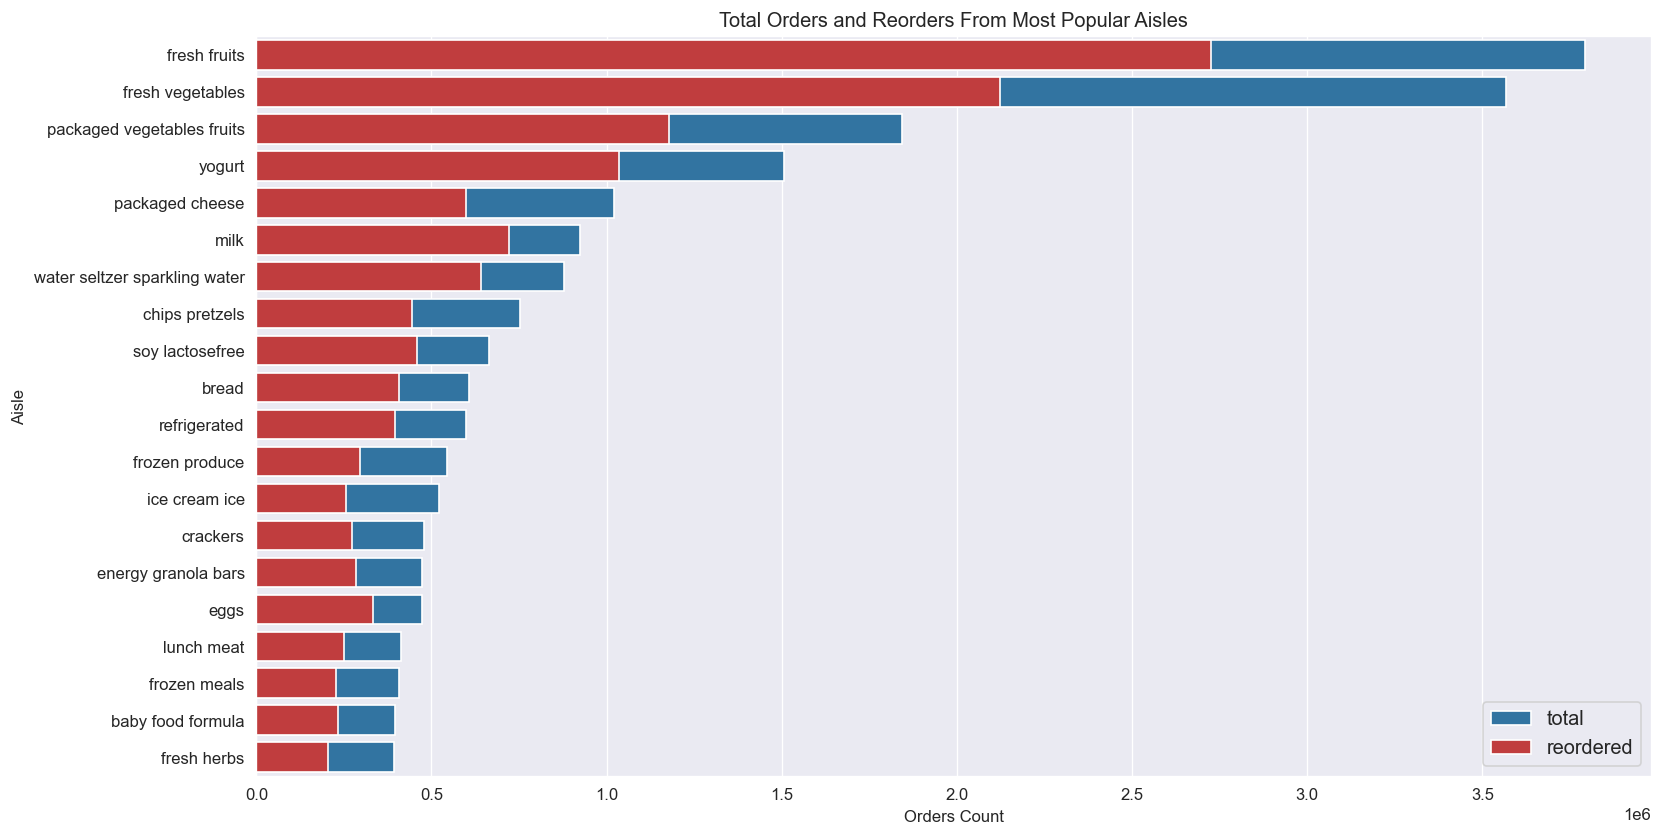

In [139]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(y = temp_df['aisle'][0:20], x = temp_df['total'][0:20], color=color[0], label = "total")
ax = sns.barplot(y = temp_df['aisle'][0:20], x = temp_df['reorders'][0:20], color=color[3], label = "reordered")
ax.set_ylabel("Aisle")
ax.set_xlabel("Orders Count")
ax.set_title("Total Orders and Reorders From Most Popular Aisles")
ax.legend(loc = 4, prop={'size': 12})
plt.show()

In [140]:
temp_df["reorder_ratio"] = temp_df['reorders']/temp_df['total']
temp_df.head()

,aisle,total,reorders,reorder_ratio
0,fresh fruits,3792661,2726251,0.718823
1,fresh vegetables,3568630,2123540,0.595057
2,packaged vegetables fruits,1843806,1178700,0.639275
3,yogurt,1507583,1034957,0.686501
4,packaged cheese,1021462,598280,0.585710


In [141]:
temp_df = temp_df.sort_values("reorder_ratio", ascending=False).reset_index()
temp_df.head()

,index,aisle,total,reorders,reorder_ratio
0,5,milk,923659,722128,0.781812
1,6,water seltzer sparkling water,878150,640988,0.729930
2,0,fresh fruits,3792661,2726251,0.718823
3,15,eggs,472009,333408,0.706359
4,8,soy lactosefree,664493,460069,0.692361


In [142]:
# ANALYSIS - Departments

In [143]:
temp_df = order_products.groupby("department")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df.head()


,total,reorders
department,,
alcohol,159294,90992
babies,438743,253453
bakery,1225181,769880
beverages,2804175,1832952
breakfast,739069,414877


In [144]:
temp_df = temp_df.sort_values('total', ascending=False).reset_index()
temp_df.head()

,department,total,reorders
0,produce,9888378,6432596
1,dairy eggs,5631067,3773723
2,snacks,3006412,1727075
3,beverages,2804175,1832952
4,frozen,2336858,1268058


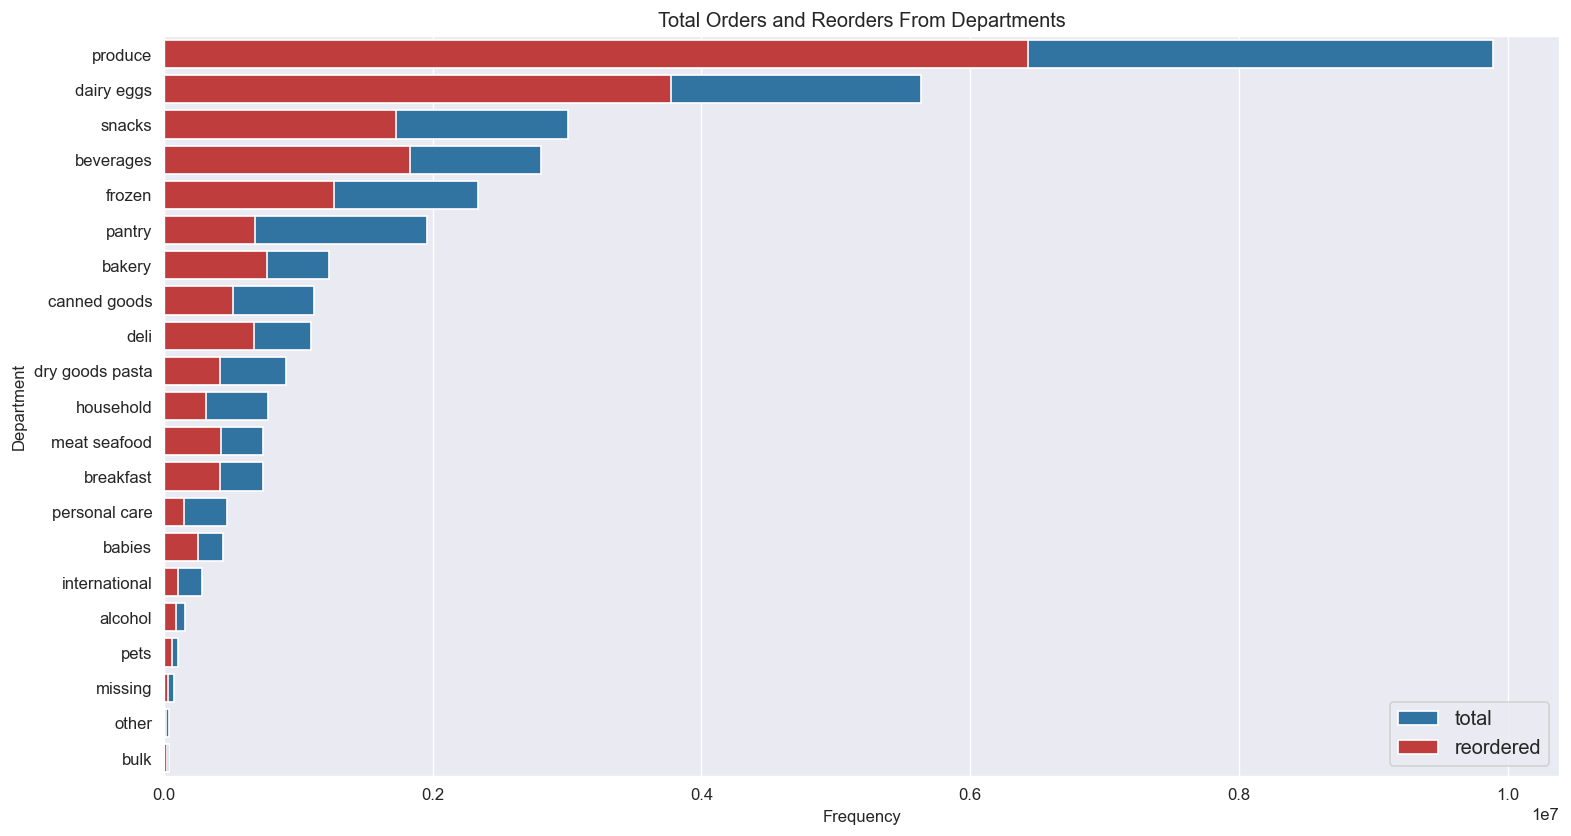

In [145]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(y = temp_df['department'], x = temp_df["total"], color=color[0], label = "total")
ax = sns.barplot(y = temp_df['department'], x = temp_df["reorders"], color=color[3], label = "reordered")
ax.set_ylabel("Department")
ax.set_xlabel("Frequency")
ax.legend(loc = 4, prop={'size': 12})
ax.set_title("Total Orders and Reorders From Departments")
plt.show()

In [146]:
temp_df["reorder_ratio"] = temp_df['reorders']/temp_df['total']
temp_df.head()

,department,total,reorders,reorder_ratio
0,produce,9888378,6432596,0.650521
1,dairy eggs,5631067,3773723,0.670161
2,snacks,3006412,1727075,0.574464
3,beverages,2804175,1832952,0.653651
4,frozen,2336858,1268058,0.542634


In [147]:
temp_df = temp_df.sort_values("reorder_ratio", ascending=False)
temp_df.head()

,department,total,reorders,reorder_ratio
1,dairy eggs,5631067,3773723,0.670161
3,beverages,2804175,1832952,0.653651
0,produce,9888378,6432596,0.650521
6,bakery,1225181,769880,0.628381
8,deli,1095540,666231,0.608130


Departments with Highest Reorder Ratio


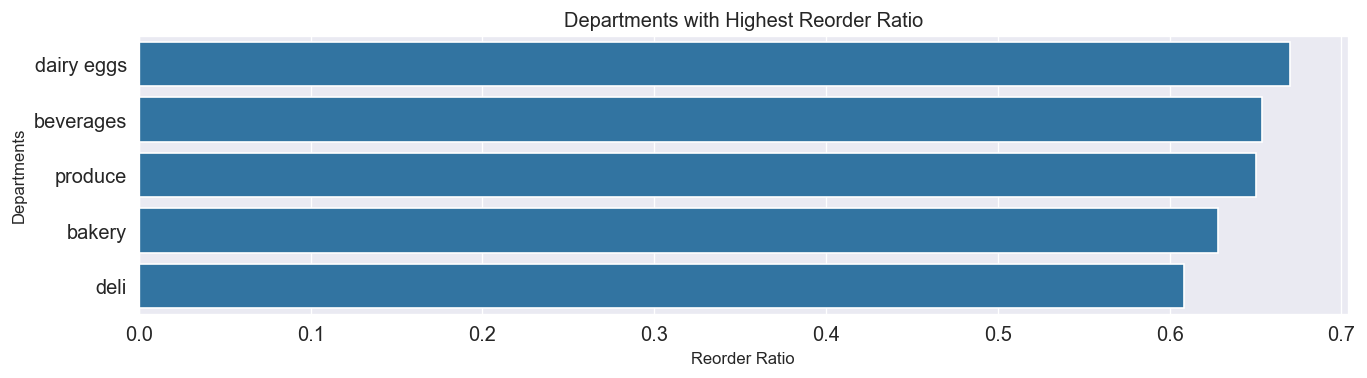

In [148]:
print("Departments with Highest Reorder Ratio")
top_5_departments = temp_df.nlargest(5, 'reorder_ratio')

fig, ax = plt.subplots(figsize = (13,3))
ax = sns.barplot(y = top_5_departments['department'], x = top_5_departments['reorder_ratio'], color=color[0])
ax.set_ylabel("Departments")
ax.set_xlabel("Reorder Ratio")
ax.set_title("Departments with Highest Reorder Ratio")
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()


In [149]:
# ANALYSIS - Products

In [150]:
temp_df = order_products.groupby("product_name")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df.head()


,total,reorders
product_name,,
#2 Coffee Filters,799,265
#2 Cone White Coffee Filters,14,3
#2 Mechanical Pencils,9,0
#4 Natural Brown Coffee Filters,247,90
& Go! Hazelnut Spread + Pretzel Sticks,174,93


In [151]:
temp_df = temp_df.sort_values('total', ascending=False).reset_index()
temp_df.head()

,product_name,total,reorders
0,Banana,491291,415166
1,Bag of Organic Bananas,394930,329275
2,Organic Strawberries,275577,214448
3,Organic Baby Spinach,251705,194939
4,Organic Hass Avocado,220877,176173


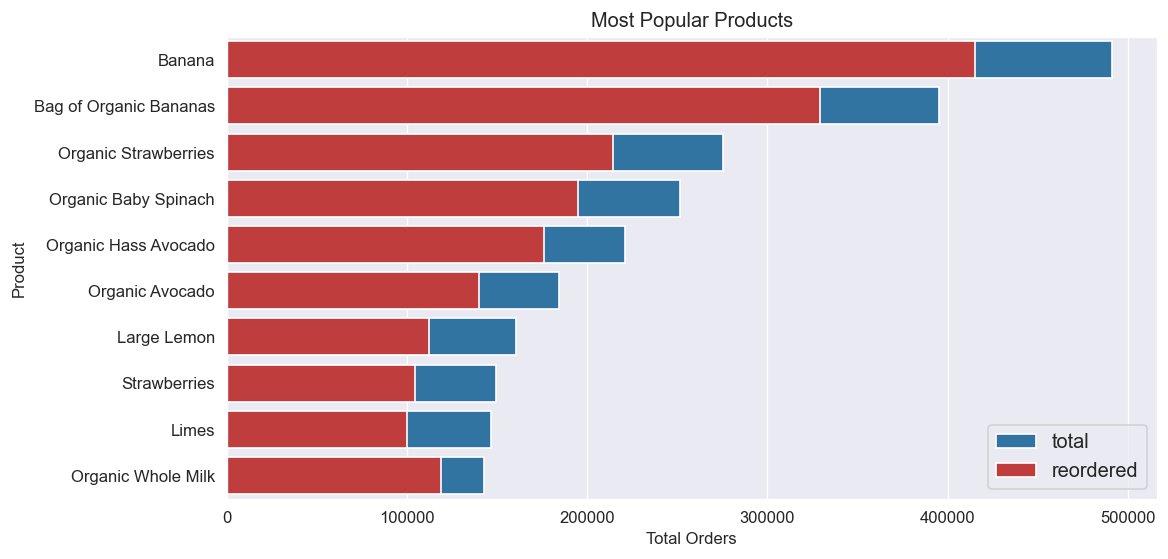

In [152]:
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.barplot(y = temp_df['product_name'][0:10], x = temp_df['total'][0:10], color=color[0], label = "total")
ax = sns.barplot(y = temp_df['product_name'][0:10], x = temp_df['reorders'][0:10], color=color[3], label = "reordered")
ax.set_ylabel("Product")
ax.set_xlabel("Total Orders")
ax.set_title("Most Popular Products")
ax.legend(loc = 4, prop={'size': 12})
plt.show()

In [153]:
temp_df["reorder_ratio"] = temp_df['reorders']/temp_df['total']
temp_df.sort_values("reorder_ratio", ascending=False).head()


,product_name,total,reorders,reorder_ratio
23853,Raw Veggie Wrappers,69,65,0.942029
21388,Serenity Ultimate Extrema Overnight Pads,90,84,0.933333
40147,Orange Energy Shots,13,12,0.923077
20296,Chocolate Love Bar,102,94,0.921569
30746,Soy Powder Infant Formula,35,32,0.914286


In [154]:
product_unique_users = order_products.groupby('product_name')['user_id'].nunique().reset_index().rename(columns={'user_id':'total_users'})
product_unique_users.sort_values('total_users', ascending = False).head(10)


,product_name,total_users
3677,Banana,76125
3472,Bag of Organic Bananas,65655
31923,Organic Strawberries,61129
28843,Organic Baby Spinach,56766
22415,Large Lemon,48614
23422,Limes,46658
42908,Strawberries,44857
30300,Organic Hass Avocado,44704
28807,Organic Avocado,43954
29011,Organic Blueberries,38720


In [155]:
product_unique_users = product_unique_users.merge(temp_df, on='product_name', how='left')
product_unique_users.head()

,product_name,total_users,total,reorders,reorder_ratio
0,#2 Coffee Filters,534,799,265,0.331665
1,#2 Cone White Coffee Filters,11,14,3,0.214286
2,#2 Mechanical Pencils,9,9,0,0.000000
3,#4 Natural Brown Coffee Filters,157,247,90,0.364372
4,& Go! Hazelnut Spread + Pretzel Sticks,81,174,93,0.534483


In [156]:
product_unique_users.sort_values("reorder_ratio", ascending=False).head(10)

,product_name,total_users,total,reorders,reorder_ratio
37379,Raw Veggie Wrappers,4,69,65,0.942029
39870,Serenity Ultimate Extrema Overnight Pads,6,90,84,0.933333
28415,Orange Energy Shots,1,13,12,0.923077
8537,Chocolate Love Bar,8,102,94,0.921569
41723,Soy Powder Infant Formula,3,35,32,0.914286
40458,Simply Sleep Nighttime Sleep Aid,4,45,41,0.911111
13844,"Energy Shot, Grape Flavor",2,22,20,0.909091
38793,Russian River Valley Reserve Pinot Noir,3,30,27,0.900000
3832,Bars Peanut Butter,7,69,62,0.898551
41712,Soy Crisps Lightly Salted,7,67,60,0.895522


In [157]:
temp_df = product_unique_users.sort_values("total_users", ascending=False)
temp_df.head()


,product_name,total_users,total,reorders,reorder_ratio
3677,Banana,76125,491291,415166,0.845051
3472,Bag of Organic Bananas,65655,394930,329275,0.833755
31923,Organic Strawberries,61129,275577,214448,0.778178
28843,Organic Baby Spinach,56766,251705,194939,0.774474
22415,Large Lemon,48614,160792,112178,0.697659


In [158]:
temp_df['cumulative_users'] = temp_df['total_users'].cumsum()
temp_df.head()

,product_name,total_users,total,reorders,reorder_ratio,cumulative_users
3677,Banana,76125,491291,415166,0.845051,76125
3472,Bag of Organic Bananas,65655,394930,329275,0.833755,141780
31923,Organic Strawberries,61129,275577,214448,0.778178,202909
28843,Organic Baby Spinach,56766,251705,194939,0.774474,259675
22415,Large Lemon,48614,160792,112178,0.697659,308289


In [159]:
temp_df = temp_df.reset_index(drop=True)
temp_df.head()

,product_name,total_users,total,reorders,reorder_ratio,cumulative_users
0,Banana,76125,491291,415166,0.845051,76125
1,Bag of Organic Bananas,65655,394930,329275,0.833755,141780
2,Organic Strawberries,61129,275577,214448,0.778178,202909
3,Organic Baby Spinach,56766,251705,194939,0.774474,259675
4,Large Lemon,48614,160792,112178,0.697659,308289


In [ ]:
#Organic Vs Inorganic

In [161]:
product_unique_users['Organic'] = product_unique_users['product_name'].str.contains("Organic")
product_unique_users.head()


,product_name,total_users,total,reorders,reorder_ratio,Organic
0,#2 Coffee Filters,534,799,265,0.331665,False
1,#2 Cone White Coffee Filters,11,14,3,0.214286,False
2,#2 Mechanical Pencils,9,9,0,0.000000,False
3,#4 Natural Brown Coffee Filters,157,247,90,0.364372,False
4,& Go! Hazelnut Spread + Pretzel Sticks,81,174,93,0.534483,False


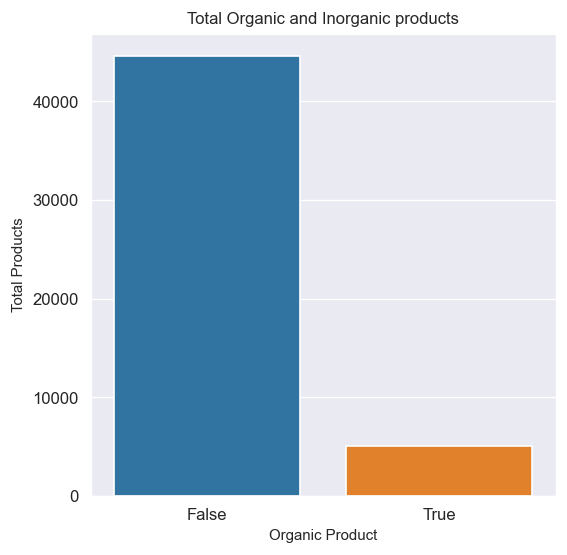

In [162]:
fig, ax = plt.subplots(figsize = (5,5))
ax = sns.barplot(x = product_unique_users.groupby('Organic').size().index, y = product_unique_users.groupby('Organic').size().values)
ax.set_xlabel("Organic Product", size = 9)
ax.set_ylabel("Total Products", size = 9)
ax.set_title("Total Organic and Inorganic products", size = 10)
plt.show()

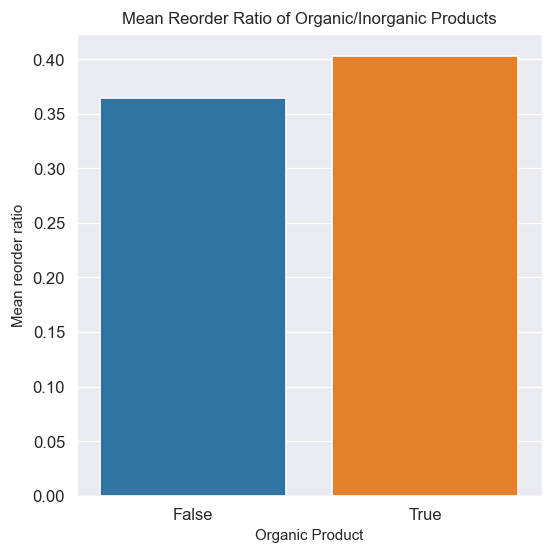

In [164]:
fig, ax = plt.subplots(figsize = (5,5))
ax = sns.barplot(x = product_unique_users.groupby('Organic')['reorder_ratio'].mean().index, y = product_unique_users.groupby('Organic')['reorder_ratio'].mean().values)
ax.set_xlabel("Organic Product", size = 9)
ax.set_ylabel("Mean reorder ratio", size = 9)
ax.set_title("Mean Reorder Ratio of Organic/Inorganic Products", size = 10)
plt.show()


In [165]:
#Add to Cart Order VS Reorder

In [166]:
temp_df = order_products.groupby('add_to_cart_order')['reordered'].mean().reset_index()
temp_df.head()


,add_to_cart_order,reordered
0,1,0.679302
1,2,0.677135
2,3,0.658426
3,4,0.637350
4,5,0.617598


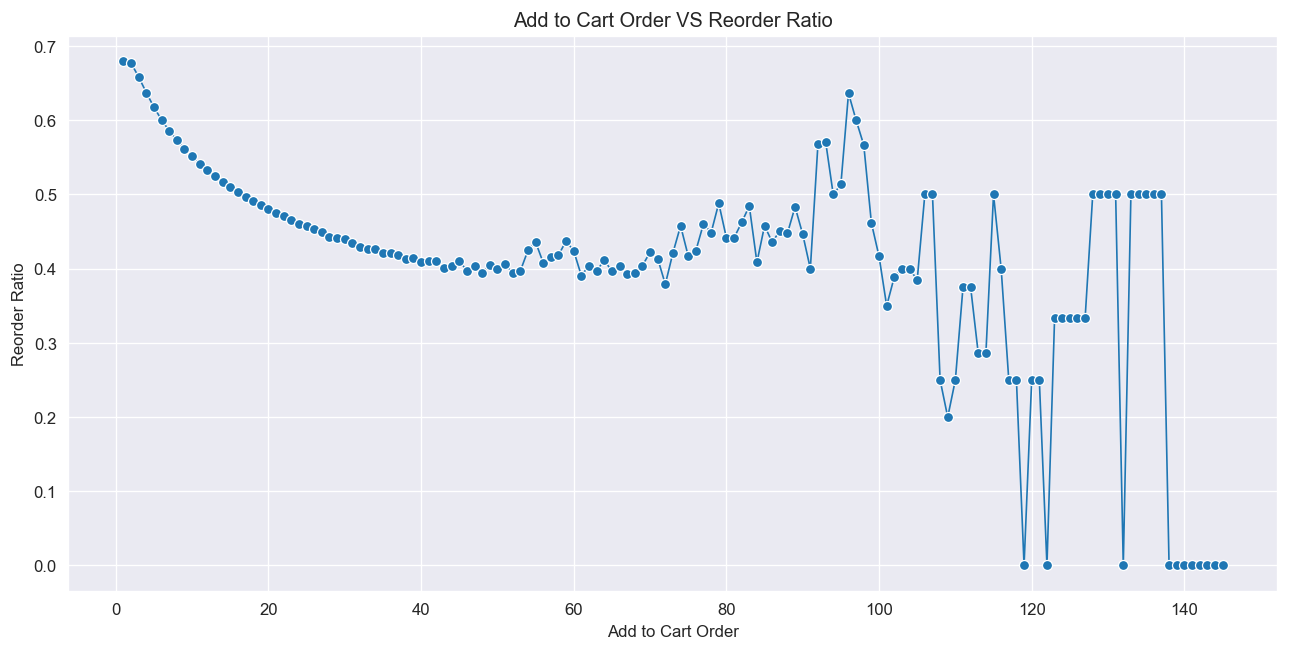

In [167]:
fig, ax = plt.subplots(figsize=(13,6))
ax = sns.lineplot(x=temp_df['add_to_cart_order'], y=temp_df['reordered'], lw = 1, marker='o')
ax.set_xlabel("Add to Cart Order")
ax.set_ylabel("Reorder Ratio")
ax.set_title("Add to Cart Order VS Reorder Ratio")
plt.show()


In [168]:
temp_df = order_products.groupby(['order_dow', 'product_name']).size().reset_index(name='counts')
temp_df.head()


,order_dow,product_name,counts
0,0,#2 Coffee Filters,144
1,0,#2 Cone White Coffee Filters,1
2,0,#2 Mechanical Pencils,1
3,0,#4 Natural Brown Coffee Filters,49
4,0,& Go! Hazelnut Spread + Pretzel Sticks,17


In [169]:
temp_df = temp_df.sort_values(['order_dow', 'counts'], ascending=[True, False])
temp_df.head()


,order_dow,product_name,counts
3418,0,Banana,101474
3224,0,Bag of Organic Bananas,75052
26887,0,Organic Baby Spinach,57556
29843,0,Organic Strawberries,56635
28284,0,Organic Hass Avocado,45841


In [170]:
temp_df = temp_df.groupby('order_dow').head(5).reset_index(drop = True)
temp_df.head()


,order_dow,product_name,counts
0,0,Banana,101474
1,0,Bag of Organic Bananas,75052
2,0,Organic Baby Spinach,57556
3,0,Organic Strawberries,56635
4,0,Organic Hass Avocado,45841


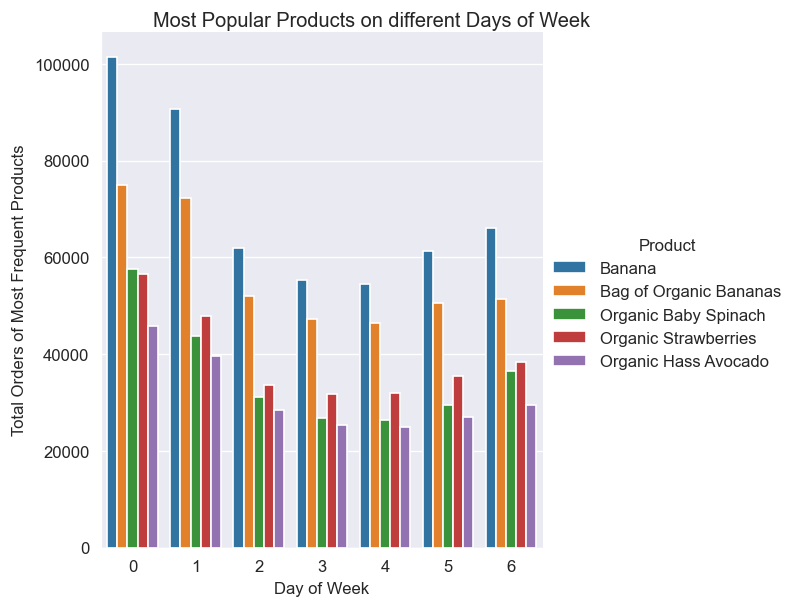

In [171]:
ax = sns.catplot(x="order_dow", y="counts", hue="product_name", data=temp_df, kind="bar", legend=False)
ax.add_legend(title="Product")
ax.set_axis_labels("Day of Week", "Total Orders of Most Frequent Products")
ax.fig.suptitle("Most Popular Products on different Days of Week", va="baseline", ha="center")
ax.savefig("Most Popular Products on Different Days of Week.png")
